<a href="https://colab.research.google.com/github/shivam-ai/Journey2AI/blob/master/TensorFlow/Fashion_mnist_with_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow import keras

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [178]:
print(tf.__version__)

1.13.0-dev20181121


In [0]:
fashion_mnist= keras.datasets.fashion_mnist

In [0]:
(train_X, train_y), (test_X, test_y)= fashion_mnist.load_data()

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [182]:
train_X[0].shape

(28, 28)

In [183]:
train_X.shape

(60000, 28, 28)

In [184]:
len(train_y)

60000

In [185]:
train_y

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [186]:
test_X.shape

(10000, 28, 28)

In [0]:
def show(img):
  plt.figure()
  plt.imshow(img)
  plt.colorbar()
  plt.grid(False)

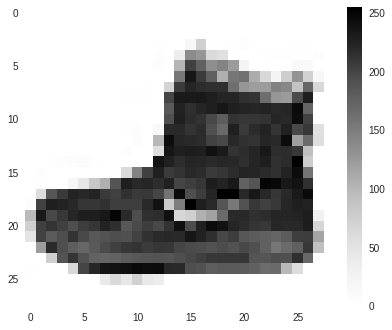

In [188]:
show(train_X[0])

In [0]:
train_X= train_X/ 255.0
test_X= test_X/ 255.0

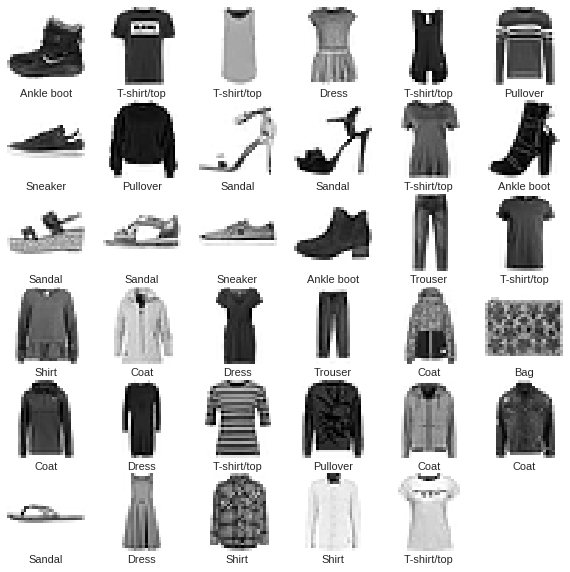

In [190]:
plt.figure(figsize= (10,10))
for i in range(35):
  plt.subplot(6, 6, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_X[i], cmap= plt.cm.binary)
  plt.xlabel(class_names[train_y[i]])

In [0]:
model= keras.Sequential([
    keras.layers.Flatten(input_shape= (28,28)),
    keras.layers.Dense(128, activation= tf.nn.relu),
    keras.layers.Dense(10, activation= tf.nn.softmax)
])

In [0]:
model.compile(optimizer= tf.train.AdamOptimizer(),
             loss= 'sparse_categorical_crossentropy',
             metrics= ['accuracy'])

In [210]:
model.fit(train_X, train_y, epochs= 5)

Epoch 1/5
60000/60000 [==============================] - 6s 94us/step - loss: 0.4976 - acc: 0.8257
Epoch 2/5
60000/60000 [==============================] - 6s 92us/step - loss: 0.3737 - acc: 0.8647
Epoch 3/5
60000/60000 [==============================] - 5s 89us/step - loss: 0.3332 - acc: 0.8781
Epoch 4/5
60000/60000 [==============================] - 5s 88us/step - loss: 0.3103 - acc: 0.8852
Epoch 5/5
60000/60000 [==============================] - 6s 92us/step - loss: 0.2925 - acc: 0.8919


In [211]:
y_pred= model.predict(test_X[0:10])
print(y_pred.argmax(axis= 1))
print(test_y[0:10])

[9 2 1 1 6 1 4 6 5 7]
[9 2 1 1 6 1 4 6 5 7]


In [212]:
test_loss, test_acc= model.evaluate(test_X, test_y)
print("Test loss is {}\nTest accuracy is {}".format(test_loss, test_acc))

10000/10000 [==============================] - 1s 58us/step - loss: 0.3381 - acc: 0.8786
Test loss is 0.33809957156181336
Test accuracy is 0.878600001335144


In [0]:
predictions= model.predict(test_X)

In [214]:
predictions[0]

array([2.20691163e-06, 2.69523923e-08, 1.28287240e-07, 1.59728017e-06,
       5.23544486e-07, 1.24113460e-03, 2.63858806e-06, 4.67124581e-02,
       1.10568006e-04, 9.51928675e-01], dtype=float32)

In [215]:
np.argmax(predictions[0])

9

In [0]:
def plot_img(i, prediction_array, true_y, img):
  prediction_array, true_y, img= prediction_array[i], true_y[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap= plt.cm.binary)
  
  predicted_y= np.argmax(prediction_array)
  if(predicted_y== true_y):
    color= 'blue'
  else:
    color= 'red'
    
  plt.xlabel('{} {:2.0f}%, ({})'.format(class_names[predicted_y],
                                       100* np.max(prediction_array),
                                       class_names[true_y]),
                                       color= color)

In [0]:
def plot_value_array(i, prediction_array, true_y, test_X):
  prediction_array, true_y= prediction_array[i], true_y[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot= plt.bar(range(10), prediction_array, color= '#777777')
  plt.ylim([0,1])
  predicted_y= np.argmax(prediction_array)
  thisplot[predicted_y].set_color('red')
  thisplot[true_y].set_color('blue')

In [0]:
def show_test(i):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2, 1)
  plot_img(i, predictions, test_y, test_X)
  plt.subplot(1,2, 2)
  plot_value_array(i, predictions, test_y, test_X)

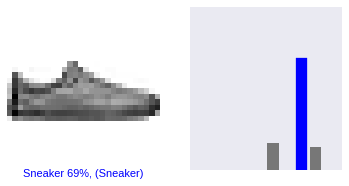

In [219]:
show_test(12)

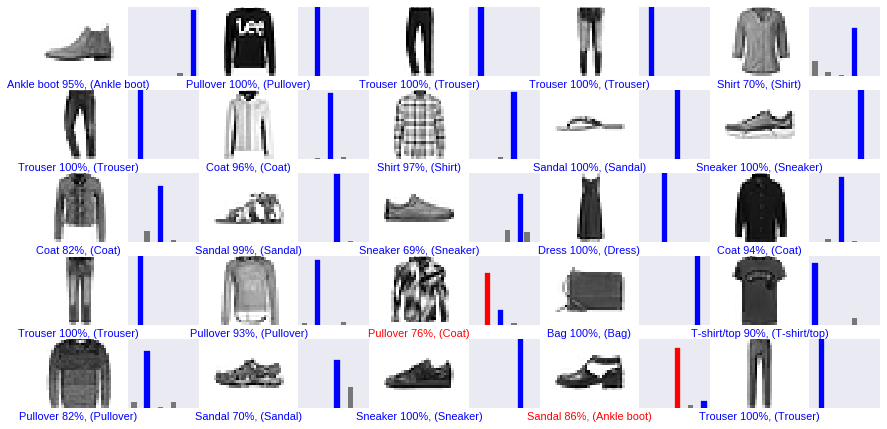

In [220]:
plt.figure(figsize= (15,15))
for i in range(25):
  plt.subplot(10, 10, i*2+1)
  plot_img(i, predictions, test_y, test_X)
  plt.subplot(10, 10, i*2+2)
  plot_value_array(i, predictions, test_y, test_X)

In [221]:
img= test_X[0]
print(img.shape)

(28, 28)


In [222]:
img= np.expand_dims(img, 0)
print(img.shape)

(1, 28, 28)


In [223]:
predict_single= model.predict(img)
print(predict_single)
print('Label: ',np.argmax(predict_single))
print('Acc:', np.max(predict_single))

[[2.2069119e-06 2.6952396e-08 1.2828750e-07 1.5972773e-06 5.2354500e-07
  1.2411341e-03 2.6385885e-06 4.6712454e-02 1.1056792e-04 9.5192879e-01]]
Label:  9
Acc: 0.9519288


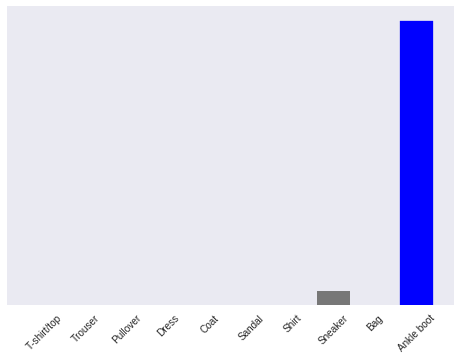

In [224]:
plot_value_array(0, predict_single, test_y, test_X)
_ = plt.xticks(range(10), class_names, rotation=45)

# **DONE**